In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")



In [2]:
# Defines function to download housing data from online source
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
# Executes function to download housing data
fetch_housing_data()

In [4]:
# Loads the data using Pandas library
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
# Function to view top rows of the data we are working with:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Method to get a quick description of the data; in particular the total number of rows, and each attributes' type and number of non null values.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Lists the categories in the data and how many values are in each category
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# Summary of Numerical Attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


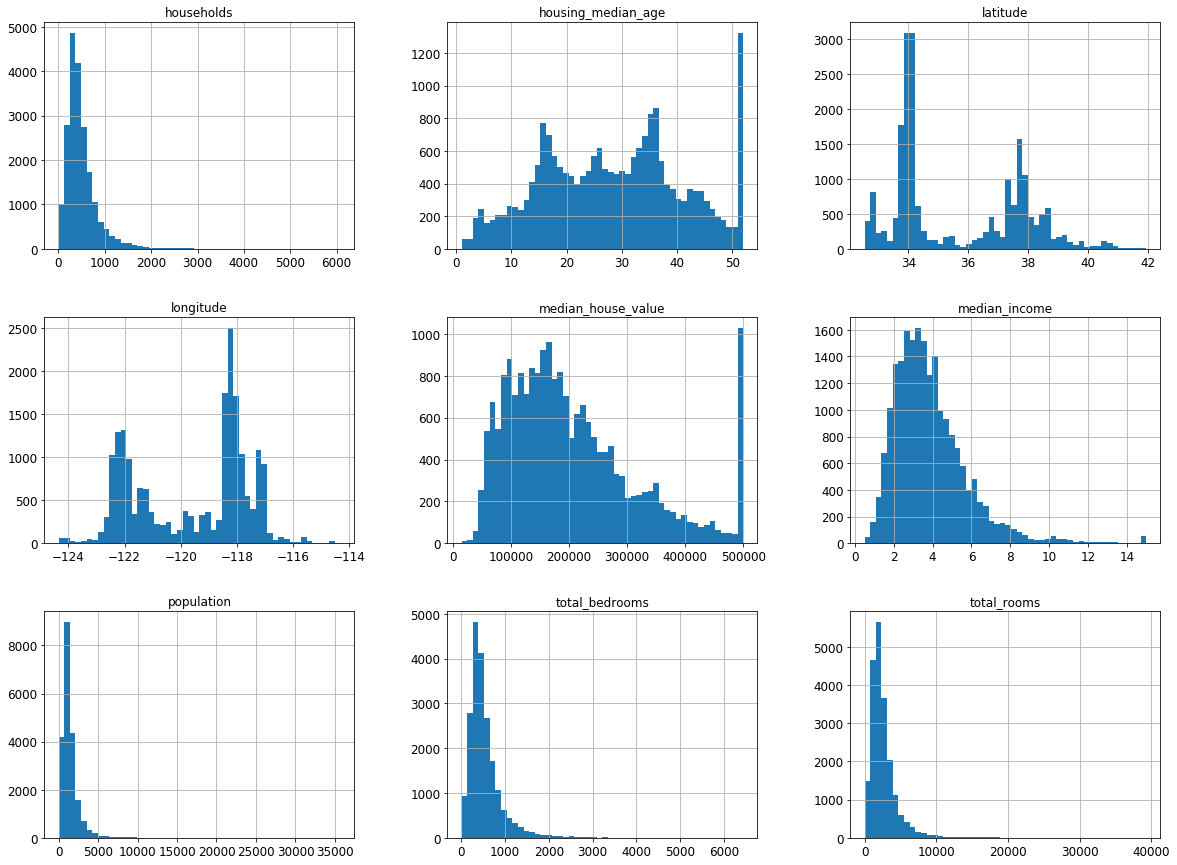

In [9]:
# Create a histogram to visually describe the data so we can have a better understadning of it.
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# command that makes randomly generated points of data predictable. It means that the same numbers that were randomly chosen will be the same each time the command is executed. The problem with the command below is that the next time the data has to be fetched, the chosen sets of data will change.
np.random.seed(42)

In [11]:
# This script will chose the same sets of random data for the test set even when the entire dataset is refreshed and/or updated
# With this script, the new test set will contain %20 of the new instances, but it will not contain any instance that was previously in the training set.

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [12]:
# Unfortunately, the housing dataset does not have an identifier column. The simplest solution is to use the row index (the first column) as the ID.
housing_with_id = housing.reset_index() #adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")



In [13]:
# So if you are using the row index as the identifier, you need to make sure that new data that is added gets appended to the end of the dataset and that no row ever gets deleted. If this isn't possible, you can try to use the most stable features to build an identifier code.
# For this housing data, the longitude and latitude of the houses are very stable so we can combine them into a unique id with the following script:

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [14]:
# So far we've used random choice to choose the test set data. This randomization is actually a problem because for larger datasets, there is a chance that the test set is not actually representative of the actual population.
# For example, for our housing data, random chance might choose test data that does not represent the correct proportion of people under a certain income bracket. The data might skew for disproportionately high or low income. We need to have Stratified Sampling
#So the following code below is meant to create the right strata with an income category attribute. Divides the median income by 1.5(to limit the number of categories) and rounding up using "ceil"(to have discrete categories), and then keeping categories lower then 5 and merging the other categories into Category 5:

housing["income_cat"] = np.ceil(housing["median_income"]/ 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


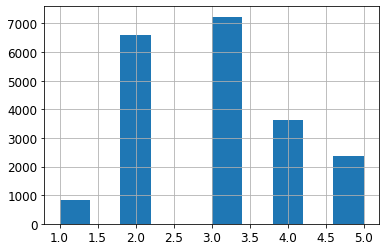

In [15]:
# Run the following command to graphically display the income categories:
housing["income_cat"].hist()

In [16]:
# Now we are ready to do stratified sampling based on the income category.
# For this use Scikit-Learn's StratifiedShuffleSplit class:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [17]:
# Let's see if the above code worked as expected. You can start by looking at the income category proprtions in te test set:

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [18]:
# Once the stratified Test Set has been created, we can remove the income_cat attribute so the data is back to its original state:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    
# We spent quite a bit of time on test set generation for a good reason: this is often a neglected but critical part of a Machine Learning project. Moreover, many of these ideas willbe useful later as we discuss cross-validation. Now it's time to move on to the next stage: Visually Exploring Data!!!!!!!!!!!...

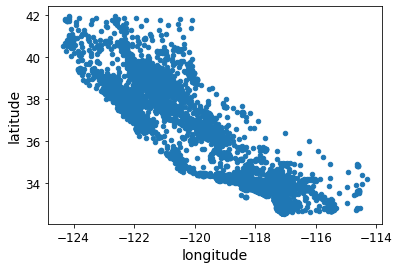

In [19]:
# Creates a scatterplot based on longitude and latitude to help us visualize the data. It resembles California
housing.plot(kind="scatter", x="longitude", y="latitude")

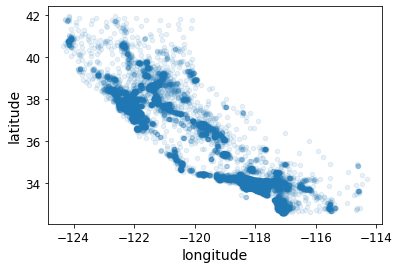

In [20]:
# Add and tune a variable called the Alpha value. It color codes the data to add darker colors to points that have a denser concentration of data points. Better for visualization.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=.1)

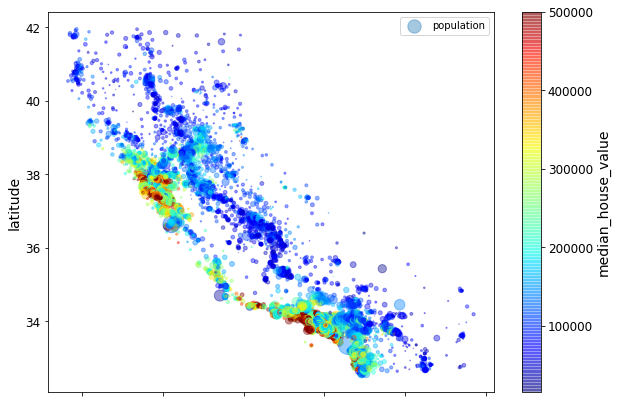

In [21]:
# Now we will visualize the California Housing Price Data
# The radius of the circle of the data point represents the population (Option S)
# The color of the circle represents the price (Option C)
# We will use a predefined color map(option cmap) called jet. Blue is low prices to Red for high prices.

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label= "population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()


In [22]:
# Compute the Standard Correlation Coefficient (Also called Pearson's R) between every pair of attributes

corr_matrix = housing.corr()

In [23]:
# Correlation Coefficient ranges between -1 to 1. Close to 1 means a strong positive correlation. Close to -1 is a inverse correlation. Example of positive correlation is that when income goes up, the median house value goes up as well. Correlation close to zero means there is no linear correlation.
# Calculate how each attribute correlates with the median house value:

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7f81579b0>,
      dtype=object)

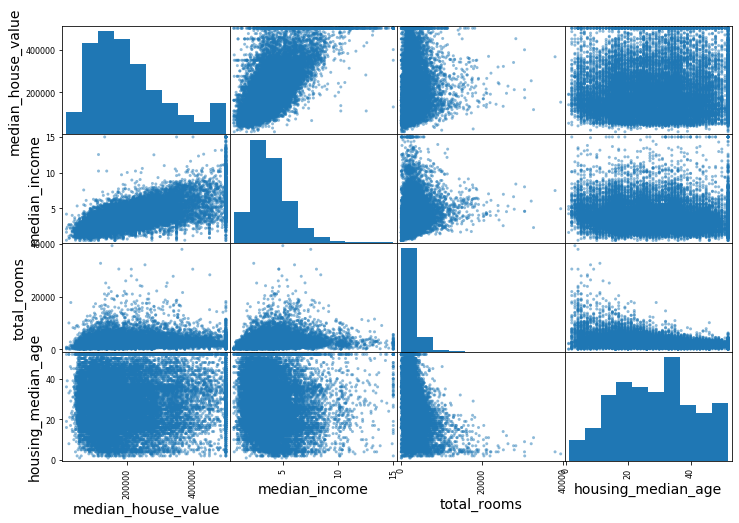

In [24]:
# Another way to check for correlation between attributes is to us Pandas, scatter_matrix function, which plots every numerical attribute against every other numerical attribute.
# Since this housing dataset has 11 attributes, there will be 11**2or 121 graphs... To much.. So we will only focus on a few of them.

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


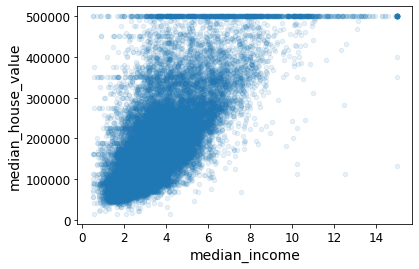

In [25]:
# Since the correlation between median_house_value and median_income seems the most promising, we will zoom in and focus on this graph,

housing.plot(kind= "scatter", x= "median_income", y= "median_house_value", alpha= 0.1)


In [26]:
# Create attribute combinations to see if there are any useful relationships:

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [27]:
# Create a correlation matrix
#Apparently the correlation between the median_house_value and the bedrooms_per_room is pretty good.

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [28]:
# Now that we've done an analysis on the housing data using some graphs and simple statistical calculations, it is time to prepare the dataset to be processed through the Machine Learning Algorithms
# Instead of preparing the data manually, we will write functions that do this for several reasons:
# The first reason is that we can quickly reproduce data transformations with new datasets
# The second reason is that we can gradually build a library of transformation functions that can be reused on different projects.
# The third reason is that we can use these functions in our live systems to tranform the data before feeding it to the machine learning algorithm.
# Finally, having a library of different dataset transformation functions will allow us to easily try various transformations and see which combination of transformations work the best.

In [29]:
# First, we will revert to a clean training set( by copying strat_train_set once again).
# We will separate the predictors and the labels since we don't necessarily want to apply the same transformations to the predictors and target values

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [30]:
# Most Machine Learning algorithms can't work with missing features, so we'll create a few functions to take care of them
# Remember that the total_bedrooms attribute had some missing values, to fix it there are three options:
# The first option is to get rid of the corresponding districts: housing.dropna(subset=["total_bedrooms"])
# The second option is to get rid of the whole attribute: housing.drop("total_bedrooms", axis=1)
# The third option is to set the value to some value(zero, the mean, the median, etc..): median housing["total_bedrooms"].median(), housing["total_bedrooms"].fillna(median, inplace=True)

In [31]:
# We choose option 2, to drop the whole attribute:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [32]:
# Drop the entire attribute of total bedrooms
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [33]:
# Also we can try option 1 which is to remove the corresponding districts with the missing total_bedrooms attribute data:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [34]:
# Option 2 to get rid of the whole attribute

sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [35]:
# Option 3 to add the median of the total bedrooms to the districts missing the total_bedrooms data:

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [36]:
# Choose Option 3 which is to add the median number of bedrooms to blank data:
# Since Scikit-Learn 0.20, the sklearn.preprocessing.Imputer class was replaced by the sklearn.impute.SimpleImputer class

try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
    
imputer = SimpleImputer(strategy="median")

In [37]:
# Since the median can only be computed with numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity:

housing_num = housing.drop("ocean_proximity", axis=1)

# Alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [38]:
# Now we can fit this Imputer class to the training data using the fit() method

imputer.fit(housing_num)

# The imputer simply computed the median of each attribute and stored the result in its statistics_instance variable.
# Since we can't be sure there WON'T be any missing data in any of the attributes, we will apply imputerto all numerical attributes.

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [39]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [40]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [41]:
# Now we can use this "trained" imputer to transform the training set by replacing the missing values with the learned medians:

X = imputer.transform(housing_num)

In [42]:
#The previous line of code created a plain Numpy array containing the transformed features. Here is the command to change it back to a Pandas Dataframe:

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)


In [43]:
# This comman states how the imputer will transform data:

imputer.strategy


'median'

In [44]:
# Earlier we left out the ocean_proximity attribute because it is text, so we can't calculate the median. 
# So in order to make this attribute more friendly to the machine learning algorithm, we can convert these categories from text to numbers.
# First, let's take a look at 10 text values for ocean_proximity:

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [45]:
# Next we can use the OrdinalEncoder class to convert text values to an integer
#First import OrdinalEncoder from Scikit-Learn:

try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder #Scikit-Learn <0.20
    


In [46]:
# Now we apply OrdinalEncoder to convert the text values:

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
    



array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [47]:
# The OrdinalEncoder method also returns the list of categories that were converted to an integer:

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
# One issue with representing text values as integers is that the ML Algorithms will assume that numbers closer together are more similar.
# To prevent this kind of false comparison, we can create another category that is binary. It will show a 1 when the data is less then 1 hour from the ocean. Or a 0 when the data is greater then 1 hour from the ocean. This binary attribute will counteract the previous problem.
# There is a SKlearn encoder or item to help perform this task called OneHotEncoder

try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder #Scikit-Learn <0.20
    
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
    


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [49]:
# In the above line, a sparse matrix was generated. A sparse matrix prevents the problem of a normal matrix wasting alot of memory. In a normal matrix there can be many attributes... Thousands that have nothing but zeros.
# To store all these zeroes into memory in a regular matrix is wasteful. So a Sparse Matrix only stores nonzero values.
# However if you want to convert the sparse matrix to a regular one, use the toarray() method:

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [50]:
# Alternatively, you can set sparse=False when creating the OneHotEncoder:

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [51]:
# We can get a list of categories using the encoder's categories_instance variable. It is a list containing a 1D array of categories for each categorical attribute.
# In our case of Housing Data, it will be a list containing a single array since there is just one categorical attribute:

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [52]:
# The following series of code is about useful transformers from Sci-Kit Learn that we can use to write automated tasks such as custom cleanup operations or combining specific attributes:
# I have to go into more detail on what exactly these transformers do, but for now, here's the code:

from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")
]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
        
# What is a hyperparameter and why do we need it?
# In this example, the transformer has one hyperparameter, add_bedrooms_per_room, set to true by default.
# This hyperparameter will will allow us to easily find out whether adding this attribute helps the machine learning algorithms or not.
# More generally, we can add hyperparameter to GATE any data preparation step we are unsure about.
# Automating data preparation steps as much as possible will allow more efficient experiments to find the best data preparation procedures.          

In [53]:
# Alternatively we can use Scikit-Learn's FunctionTransformer class to easily create a transformer  based on a transformation function.

from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = FunctionTransformer(add_extra_features, validate=False, kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [54]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"], 
    index=housing.index)
housing_extra_attribs.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [55]:
# One of the most important transformations we can apply to the data is known as Feature Scaling. Most Machine Learning Algorithms don't perform well when various numerical attributes have very different scales.
# An example would be that the total number of rooms is: 6-39320, while the median income range is only: 0-15.
# Scaling the target values is generally not required.
# There are two common ways to get attributes to have the same scale: min-max scaling and standardization
# Min-Max Scaling: values are shifted and rescaled so they end up ranging from 0-1. Using MinMaxScaler
# Standardization: Subtracts the mean value, and then divides by the standard deviation so that the resulting distribution has unit variance.
    # Standardization is not bound by a range which can be a problem with neural networks.. But they are much less affected by outliers.
    # Use the command: StandardScaler
# As with all transformations, only fit to the training data... Not the test data and full data set.

In [56]:
# In order to perform all these data transformations... and perform them in the right order, Sci-Kit Learn provides the Pipeline class to help with such sequences of transformations.
# Here is a small pipeline for the numerical attributes:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

# The above lines of code show that 3 transformers are automatically applied to the data:
    # First the Simple Imputer adding the Median value of an attribute to blank entries
    # Secondly, the attribs_adder function which is a combination of transformations that I need to review.
    # Finally there is the Standard Scalar transformation which makes the scaling of different attributes the same magnitude so that the MAchine Learning Algorithm can better learn from the data.
    

In [57]:
# Display the transformed housing data in an array:

housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [58]:
# Next we will create a transformer that will allow us to feed a Pandas Dataframe containing non-numerical columns directly into our "pipeline" without first having to manually extract the NUMERICAL columns into a Numpy Array:

try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
    

In [59]:
housing_prepared


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [60]:
# Command shows transformed array's total rows and columns

housing_prepared.shape

(16512, 16)

In [61]:
# Finally, we are ready to select and train a machine learning model!
# In summary, before selecting the ML algorithm, we first had to:
    #Frame the problem
    # Retrieve the data and explored it manually using some statistical techniques
    # Sampled a training set and test set
    # Wrote transformation pipelines to clean up and prepare our data for machine learning algorithms
    

In [62]:
# First, let's train a Linear Regresion model:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Now we have a working Linear Regression Model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# Now let's try this Linear Regression model on some instances in the training set:

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))



Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [64]:
# Compare against the actual values:

print("Labels:", list(some_labels))

# What are these? The housing price?
# The predictions are not exactly accurate, the first prediction is off by around 40%


Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [65]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [66]:
# Let's measure the regression model's RMSE on the whole training set using Scikit-Learn's mean_squared_erro function:

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse




68628.19819848922

In [67]:
# The value output is the error in dollars of the median housing values for a paticular area. So the RMSE for an area is predicted to be about a $70K deviation from the actual median housing value in the area.
# This is an example of the model underfitting the data.
# Underfitting means that the features don't provide enough information to make a good prediction or we have chosen the wrong model... It isn't powerful enough.
# To solve this we can choose a more powerful model, feed it more data, or reduce the constraints on the model.

In [68]:
# First we will try a DecisionTreeRegressor... A more powerful model capable of finding complex nonlinear relationships in data:

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [69]:
# Now that the model is trained, let's evaluate it on the training set:

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [70]:
# It looks like the above model overfitted the training data. The best practics is to use 1/2 the training data to model, the other 1/2 to test, and finally to use the test data once we are ready to test a nearly complete training model.
# We can use Sci-Kit Learn's cross-validation feature. The following code performs K-fold cross-validation: it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [71]:
# Let's look at the results:

def display_scores(scores):
    print("Scores", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [72]:
# Note that the DecisionTree model seems to perform worse. The error is about a $71K +/- $2.4K deviation from the actual housing median price.
# Cross-validation allows you to to estimate the performance of the model as well as the precision of this estimate.
#Let's compute the same scores for the linear regression model just to be sure:

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


In [73]:
# The DecisionTree model is worse then the LinearRegression Model because it is overfitting so much.

In [74]:
# Now we will try the RandomForestRegressor Model.

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [75]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

# This RMSE Error is much better, about $22K off the actual median housing value.

21933.31414779769

In [76]:
# Let's calculate the statistical scores for the RandomForestRegressor Model:

from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


In [77]:
# I'm not really sure what this series of code is for... Seems like another way to view various statistical data on the various Root Mean Square Errors calculated... Or the differences between the predicted housing values and the actual housing values

scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

In [78]:
# Assuming we have a shortlist of promising models, we need to fine-tune them.
# The first way would be to fiddle with the hyperparameters using Sci-kit Learn's GridSearchCV. Just tell it which hyperparameters you want it to experiment with, and what values to try out... And it will evaluate all possible combinations of hyperparameter values, using cross-validation.
# The following code searches for the best combination of hyperparameter values for the RandomForestRegressor:

from sklearn.model_selection import GridSearchCV

param_grid = [
    # Try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

forest_reg = RandomForestRegressor(random_state=42)
# Train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [79]:
# Command displays the best hyperparameter combination found:

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [80]:
# Another command that displays best hyperparameter combinations:

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [81]:
# I'm still quite unsure about what these hyperparameter values are all about.
# Also there is this thing about evaluation scores... WTF? Here is the code to evaluate:

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [82]:
# In this example we obtain the best solution by setting the max_features hyperparameters to 8 and the n_estimators hyperparameter to 30. Thr RMSE is 49682 which is better then using the default values with a score of 52564.
# We've successfully fine-tuned this model!

In [83]:
# The grid search approach is fine when you are exploring relatively few combinations like in the previous example, but when the search space is large, it is better to use the RandomizedSearchCV instead.
# Unlike the GridSearchCV class which tries out all possible combinations, the RandomizedSearchCV evaluates a given number of random combinations by selectin a random value for each hyperparameter at every iteration.
# RandomizedSearchCV has two main benefits:
    # Can explore many more different values then the Grid Search
    # You have more control over the computing budget you want to allocate to hyperparameter search simply by setting the number of iterations.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [84]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


In [86]:
# Another way to fine tune the system is to try to combine models that perform the best.
# For example, it seems that the RandomForestRegressor model performs the best. This indicates the relative importance of each attribute for making accurate predictions:

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [88]:
# Let's display these importance scores next to their corresponding attribute names:

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder =cat_pipeline.named_steps["cat_encoder"] #old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

# With the information presented below, we can try dropping less useful features.
# Also, we can look at specific errors that the system makes, what makes them, and what could fix the problem. (For example... Adding extra feautures or getting rid of uninformative ones, removing outliers, etc...)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [90]:
# After tweaking the models and getting sufficiently good predictions, it is time to evaluate the final model on the test set.
# This is the process: get the predictors and labels from the test set, run the full_pipeline to transform the data(te command is transform()) and evaluate the final model on the test set:

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [92]:
# Displays the final RMSE. This will be slightly worse on the test data then the validation data because the hyperparameters were tuned specifically for the known validation data... So it won't be as tuned on the unknown data.
final_rmse 

47730.22690385927

In [93]:
# Now comes the project prelaunch phase: we meed tp present our solution, document everything, and create nice presentations with clear visualizations and easy-to-remember statements.


In [ ]:
# The prelaunch phase has been completed and we have permission to launch the machine learning model out into the wild.
# Before doing that you need to:
    # Plug production data into your system and write tests
    # Write monitoring code to check your system's live performance at regular intervals and trigger an alert when performance drops.Models tend to rot as circumstances change.
# Solutions will need to be monitored for their validity in the real world... Mainly through real human experts who have real experience, or a crowd of people, etc...
# Also it is important to monitor system inputs to make sure they are good quality.
# Finally, you want to automate the process for regularly training your model on fresh data. Conditions change and the model has to adapt.
    
